# Modelling an Ideal Gas

In statistical mechanics, we can often predict the properties of a large collection of items using averages. We can show that the averages will result in the predicted properties using numerical simulations. This can be used in modelling chemical rates of reaction or behaviour of exotic matter (e.g., 2D quantum gases)

We can consider the general properties of an ideal gas as statistical averages of many particles interacting. For this example, we will model an ideal gas as elastic (energy-conserving) collisions between spherical objects.

## Theory of Collisions

We can simplify the ideal gas into many, many two-particle collisions, and ignore any collisions between more than two particles. We will also assume spherical gas particles, of identical masses.

In the real world, collisions between objects have to follow these three rules

1. Conservation of Energy\
    a. The sum of kinetic energies of the particles remains the same before and after the collision
2. Conservation of Linear Momentum\
    a. The sum of momentum (vector) remains the same
3. Conservation of Angular Momentum\
    a. The force applied on each particle must be normal to the surface


![image.png](https://upload.wikimedia.org/wikipedia/commons/2/2c/Elastischer_sto%C3%9F_2D.gif)


Using these three rules, we can reduce the the equations for the collision between two particles to be completely deterministic. We will consider a collision in two dimensions, as collisions between two particles in ANY number of dimensions can be seen as a two-dimensional model. The variables involved in any collision is defined by initially:

* Particle 1 Initial Speed $v_1$
* Particle 2 Initial Speed $v_2$
* Particle 1 Angle of Approach $\theta_1$, which we will define as $0$ without loss of generalisation
* Particle 2 Angle of Approach $\theta_2$
* Particle Contact Angle $\phi$

The equation governing the collision can be written in $x$ and $y$ components. The equations are taken from [Wikipedia](https://en.wikipedia.org/wiki/Elastic_collision). For particle 1,

$$
v'_{1x} = v_2 \cos(\theta_2 - \phi)\cos(\phi)+v_1\sin(\theta_1 - \phi)\cos(\phi + \frac{\pi}{2}) \\
v'_{1y} = v_2 \cos(\theta_2 - \phi)\sin(\phi)+v_1\sin(\theta_1 - \phi)\sin(\phi + \frac{\pi}{2})
$$

And swap the subscripts for particle 2,

$$
v'_{2x} = v_1 \cos(\theta_1 - \phi)\cos(\phi)+v_2\sin(\theta_2 - \phi)\cos(\phi + \frac{\pi}{2}) \\
v'_{2y} = v_1 \cos(\theta_1 - \phi)\sin(\phi)+v_2\sin(\theta_2 - \phi)\sin(\phi + \frac{\pi}{2})
$$

Using these two equations, we can find the final speeds of the particles.

$$
v'_1 = \sqrt{v^{'2}_{1x} + v^{'2}_{1y}} \\
v'_2 = \sqrt{v^{'2}_{2x} + v^{'2}_{2y}} \\
$$

## Maxwell-Boltzmann Distribution

In the classical physics regime (continuous range of energies), any mixture at thermal equilibirum tends to have a Maxwell-Boltzmann distribution. We will be considering the speed distribution of a monoatomic ideal gas.

This distribution is essentially the most probable distribution of speeds in a gas of a certain total energy. The distribution is given by


$$
\begin{split}
f(v) 
&= \sqrt{\frac{2}{\pi}}\left( \frac{m}{k_BT} \right)^{3/2} v^2 \exp{\left[ -\frac{m}{k_BT}v^2 \right]} 
\end{split}
$$

where $m$ is the particle mass, $k_B$ is Boltzmann's constant, $T$ is the temperature and $v$ is the particle velocity.

# Simulation

**Problem Statement: Can we reproduce the Maxwell-Boltzmann Distribution for an Ideal Gas?**

As mentioned, the properties of an ideal gas are related to the probabilities of find particles at a certain velocity, or energy, or some other parameter. For example, the mean velocity of a gas is related to the temperature, energy per particle can be related to the pressure.

We will be using a list to keep track of the speeds of the particles. The collisions between particles will be taken randomly from this list, with randomly selected angle of approach and contact angle. By repeating this process, we can find the final distribution of speeds in an ideal gas.

## Importing Libraries

First, we need to import the nesseary libraries. We will need 

1. `matplotlib.pyplot` for plotting
2. `numpy` for doing math

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initial Variables

We also need to set up the inital variables for our model. We will need the initial distribution of speeds for the particles, as well as the number of particles. We will also set the number of collisions for our simulation For starters, we will use an even distribution of speeds and see how they diverge into the Boltzmann distribution.

In [2]:
initial_velocity = 100                                                  # Initial speed of particles
num_particles = int(1E4)                                                # Total Number of particles
velocities = [initial_velocity for i in range(num_particles)]           # A list of the particles
num_collisions = int(2E6)                                               # Number of Collisions

## Collision Function

Next, we need a function to model the collision between particles. This function should take in four variables

1. Angle of approach
2. Contact angle
3. Speed of particle 1
4. Speed of particle 2

And output

1. Final Speed of particle 1
2. Final Speed of particle 2

We will use the equations above.

In [3]:
def collision(theta, phi, v1, v2):
    particle_1_final_vel_x = v2*np.cos(theta - phi)*np.cos(phi) + v1*np.sin(-phi)*np.cos(phi+np.pi/2)
    particle_1_final_vel_y = v2*np.cos(theta - phi)*np.sin(phi) + v1*np.sin(-phi)*np.sin(phi+np.pi/2)

    particle_1_final = np.sqrt(particle_1_final_vel_x**2 + particle_1_final_vel_y**2)

    particle_2_final_vel_x = v1*np.cos(- phi)*np.cos(phi) + v2*np.sin(theta - phi)*np.cos(phi + np.pi/2)
    particle_2_final_vel_y = v1*np.cos(- phi)*np.sin(phi) + v2*np.sin(theta - phi)*np.sin(phi + np.pi/2)

    particle_2_final = np.sqrt(particle_2_final_vel_x**2 + particle_2_final_vel_y**2)

    return particle_1_final, particle_2_final

## Running the Simulation

We can now run the function over the particles, repeated with the number of collisions. The particles are randomly selected and so are the angles involved.

In [4]:
for i in range(num_collisions):
    particle1, particle2 = np.random.randint(0, num_particles, size = 2)
    # Randomly selects two particles for collision

    theta = np.random.uniform(0, np.pi)             # Randomly selects collision angles from a uniform distribution
    phi = np.random.uniform(0, np.pi)

    final1, final2 = collision(theta, phi, velocities[particle1], velocities[particle2])

    velocities[particle1] = final1                  # Updates the velociies of the particles post-collision
    velocities[particle2] = final2

## Plotting the results

We can now plot the final distribution of speeds of particles as a histogram and observe the results. We simply use the `hist()` function in `matplotlib.pyplot` to plot the distribution, with 500 bins

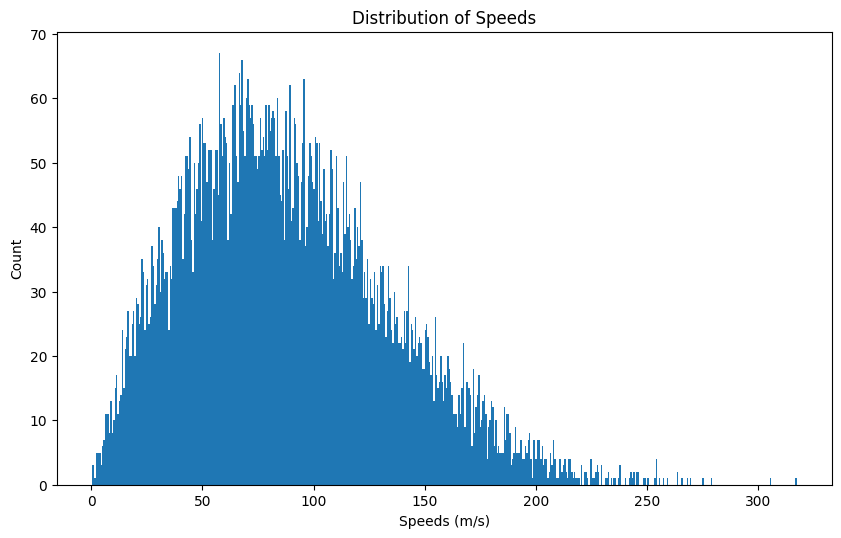

In [10]:
plt.figure(figsize = (10, 6), dpi = 100)        # Changing the resolution

plt.hist(velocities, bins = 500)                # PLotting a histogram
plt.title("Distribution of Speeds")             # Header
plt.xlabel("Speeds (m/s)")                      # labelling x and y axes
plt.ylabel("Count")
plt.show()

In comparison, we can plot a [Boltzmann distribution](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution). Given average initial velocities of $\langle v\rangle = 100$m/s, we can find that the temperature of the gas is


$$
\begin{split}
\langle v\rangle 
&= \sqrt{\frac{8k_B T}{\pi m}} \\
\frac{k_BT}{m} 
&= \langle v \rangle^2 \cdot\frac{\pi}{8} \\
&= 1250\pi
\end{split}
$$

Where $m$ is the mass of the particle. The Boltzmann distribution for speed is 

$$
\begin{split}
f(v) 
&= \sqrt{\frac{2}{\pi}}\left( \frac{m}{k_BT} \right)^{3/2} v^2 \exp{\left[ -\frac{m}{k_BT}v^2 \right]} 
\end{split}
$$

Using `numpy`'s `linspace` function, we can get a range of velocities and find the probability of finding a single particle at that velocity. Multiplying by the number of particles gives us the distribution of velocities expected in our set-up.

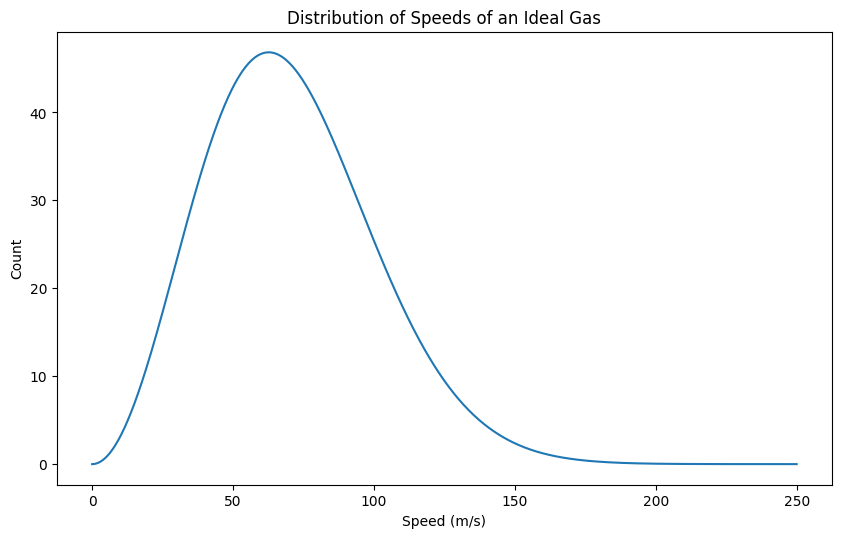

In [9]:
v = np.linspace(0,250,1000)                                             # Creates a numpy array of 1000 evenly-spaced points between 0 - 250

f_v = np.sqrt(2/np.pi) * (8/initial_velocity**2/np.pi)**(3/2) * v**2 * np.exp(-8/initial_velocity**2/np.pi * v**2) * num_particles
                                                                        # Finds the probability of each velocity from the formula
plt.figure(figsize = (10, 6), dpi = 100)

plt.plot(v, f_v, label = "Maxwell-Boltzmann Distribution")
plt.title("Distribution of Speeds of an Ideal Gas")
plt.ylabel("Count")
plt.xlabel("Speed (m/s)")
plt.show()

Overlapping them,

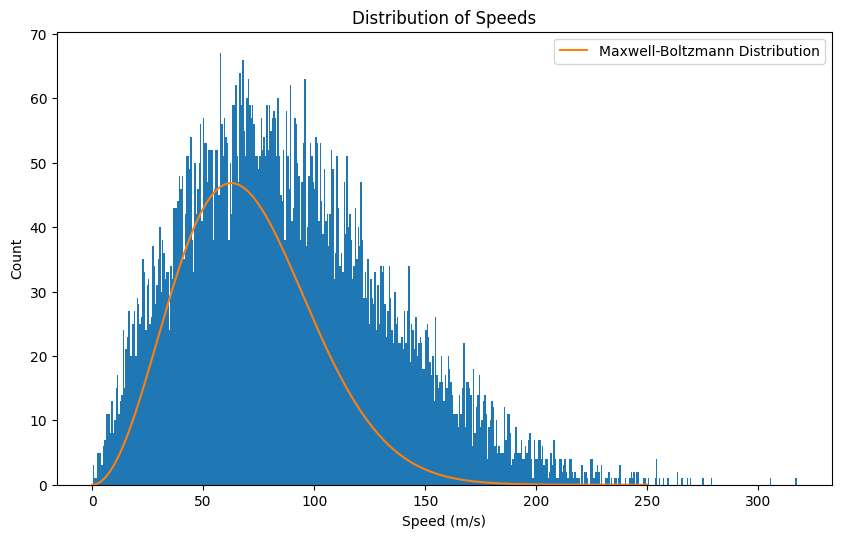

In [8]:
plt.figure(figsize = (10, 6), dpi = 100)

plt.hist(velocities, bins = 500)
plt.plot(v,f_v, label = "Maxwell-Boltzmann Distribution")

plt.title("Distribution of Speeds")
plt.legend()
plt.xlabel("Speed (m/s)")
plt.ylabel("Count")

plt.show()

# Possible Extensions

1. How can we improve the model? What about Van der Waal's attraction?
2. Is the fit better with more or less particles? What about number of collisions? Or against temperature?
3. What if there was a mix of two monoatomic gases?
4. Can you determine the heat capacity of the gas? Does it follow the equipartition theorem for ideal gases?
5. For a chemical reaction, there is often a potential barrier that has to be overcome before the two constituents can react.\
    a. By using the plot, determine the rate of reaction given a certain activation energy\
b. [Very hard] Model the reaction between two monoatomic gases with a given activation energy. 
6. [Very hard] What of we consider more degrees-of-freedom, e.g., diatomic gases
7. Consider this gas in a box. Do we get our expected relations for an ideal gas, $PV=nRT$?